In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [9]:
#load libraries 
import time,os, pickle
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import R2h_module
import imp
imp.reload(R2h_module)

<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [10]:
dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}

dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [11]:
dfs_pair = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  508232
Q2>1.0 and Q2<4.0 508232  (100.00  %)
0.2<h1_p<5.0  508232  (100.00  %)
inelasticity < 0.85 508232  (100.00  %)
h1_pid = pions (trigger) 508232  (100.00  %)
2.2 < nu <4.2 508232  (100.00  %)
10< h1_th 508232  (100.00  %)
Theta/P fiducial region selected for trigger hadron 508232  (100.00  %)
Nom cuts for the trigger applied 243989  (48.01  %)
Entries before cut  482681
Q2>1.0 and Q2<4.0 482681  (100.00  %)
0.2<h1_p<5.0  482681  (100.00  %)
inelasticity < 0.85 482681  (100.00  %)
h1_pid = pions (trigger) 482681  (100.00  %)
2.2 < nu <4.2 482681  (100.00  %)
10< h1_th 482681  (100.00  %)
Theta/P fiducial region selected for trigger hadron 482681  (100.00  %)
Nom cuts for the trigger applied 233985  (48.48  %)
Entries before cut  208328
Q2>1.0 and Q2<4.0 208328  (100.00  %)
0.2<h1_p<5.0  208328  (100.00  %)
inelasticity < 0.85 208328  (100.00  %)
h1_pid = pions (trigger) 208328  (100.00  %)
2.2 < nu <4.2 208328  (100.00  %)
10< h1_th 208328  (100.00  %)
Theta/P 

In [12]:
for c in dfs_pair['MC_D'].columns:
    #if "h1_" in c:
    print(c)

dphi
dphi_lab
drap
h1_z
h2_z
h1_cm_pt
h2_cm_pt
h1_xf
h2_xf
h1_rap
ycm
h2_rap
h1_pid
h2_pid
h1_cm_ph
h2_cm_ph
h1_cm_th
h2_cm_th
pair_mass
pair_pt
mx_eh1h2x
mx_eh1x
mx_eh2x
t
Q2
nu
W
e_px
e_py
e_pz
e_p
e_ph
e_th
SampFracEl25
SampFracEl20
TargTypeSM
TargType
x
u
h1_ph
h1_th
h2_ph
h2_th
h1_deltaZ
h2_deltaZ
h1_Nphe
h2_Nphe
h1_Sector
h2_Sector
h1_FidCut
h2_FidCut
h1_FidCutPiPlus
h2_FidCutPiPlus
h1_Chi2CC
h2_Chi2CC
h1_StatCC
h2_StatCC
h1_Betta
h2_Betta
h1_T4
h2_T4
evnt
pass_recon
dphi_truth
dphi_lab_truth
drap_truth
h1_truth_z
h2_truth_z
h1_truth_cm_pt
h2_truth_cm_pt
h1_truth_xf
h2_truth_xf
h1_truth_rap
ycm_truth
h2_truth_rap
h1_truth_pid
h2_truth_pid
h1_truth_cm_ph
h2_truth_cm_ph
h1_truth_cm_th
h2_truth_cm_th
pair_mass_truth
pair_pt_truth
mx_eh1h2x_truth
mx_eh1x_truth
mx_eh2x_truth
t_truth
Q2_truth
nu_truth
W_truth
x_truth
u_truth
h1_truth_ph
h1_truth_th
h2_truth_ph
h2_truth_th
e_truth_px
e_truth_py
e_truth_pz
e_truth_p
e_truth_ph
e_truth_th
inelasticity
diff_phi_cm
pi
h1_e
h2_e
h2_mass
h1_p

53448 628


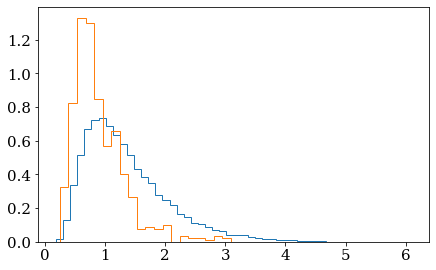

In [13]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

pass_ = dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==211" + " and "+ othercuts)
fail =dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==2212" + " and "+ othercuts)

print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("h1_cm_pt/h2_cm_pt")
for var in testvars:
    
    plt.hist(pass_.eval(var), bins=50, density=True, histtype='step')
    plt.hist(fail.eval(var), bins=20, density=True, histtype='step')
    plt.show()

0.020495051329782334
0.011537681773780341
0.0071142894004460255
{321, 2212, -211, -9999, -11}


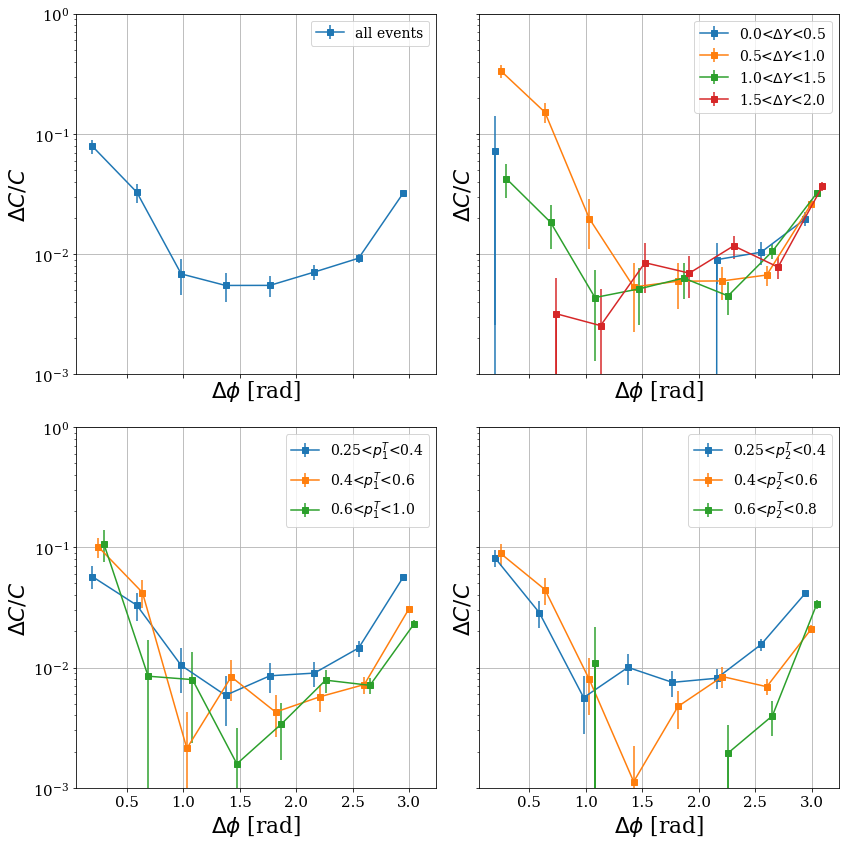

In [41]:
syst_from_misid={}
syst_from_misid_ratios={}
keys = "all dY pT1 pT2".split()
for A in "D".split():
    j = 0
    fig, axs=plt.subplots(2,2, figsize=(12, 12), sharex = True, sharey=True)
    df = dfs_pair[f'MC_{A}']

    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
    othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
    othercuts += " and h1_cm_pt<10"
    othercuts += " and h2_cm_pt<10"

    num = df.query(othercuts+" and (h1_truth_pid != 211 or h2_truth_pid != -211) and h1_truth_pid !=-9999 and h1_pid==211 and h2_pid==-211")
    
    h1fail = df.query(othercuts+" and (h1_truth_pid != 211) and h1_pid==211 and h2_pid==-211")
    h2fail = df.query(othercuts+" and (h2_truth_pid != -211) and h1_pid==211 and h2_pid==-211")
    h1fail_p = df.query(othercuts+" and (h1_truth_pid == 2212 or h2_truth_pid == 2212) and h1_pid==211 and h2_pid==-211")
    h1fail_K = df.query(othercuts+" and (abs(h1_truth_pid) == 321 or abs(h2_truth_pid)==321) and h1_pid==211 and h2_pid==-211")
    
    #num = num.query("h1_truth_pid !=-9999")
    
    denom= df.query(othercuts+" and h1_pid==211 and h2_pid==-211 and h1_truth_pid != -9999")
    print(len(h1fail)/len(denom))
    print(len(h1fail_p)/len(denom))
    print(len(h1fail_K)/len(denom))
    print(set(h1fail.h1_truth_pid))

    slice_conds= ["drap==drap"]
    for i in range(4):
        slice_conds.append(f"drap>{0.5*i} and drap<{0.5*(i+1)}")

    slice_conds.append(f"h1_cm_pt>0.25 and h1_cm_pt<0.4")
    slice_conds.append(f"h1_cm_pt>0.4 and h1_cm_pt<0.6")
    slice_conds.append(f"h1_cm_pt>0.6 and h1_cm_pt<1.0")    

    slice_conds.append(f"h2_cm_pt>0.25 and h2_cm_pt<0.4")
    slice_conds.append(f"h2_cm_pt>0.4 and h2_cm_pt<0.6")
    slice_conds.append(f"h2_cm_pt>0.6 and h2_cm_pt<0.8")    

    labels = "all events;0.0<$\Delta Y$<0.5;0.5<$\Delta Y$<1.0;1.0<$\Delta Y$<1.5;1.5<$\Delta Y$<2.0;"
    labels+= "0.25<$p^T_1$<0.4;0.4<$p^T_1$<0.6;0.6<$p^T_1$<1.0;"
    labels+= "0.25<$p^T_2$<0.4;0.4<$p^T_2$<0.6;0.6<$p^T_2$<0.8"
    labels= labels.split(";")

    shift=0
    for i, (slice_cond, label) in enumerate(zip(slice_conds, labels)):
        plt.sca(axs[j//2][j%2])
        n, x = np.histogram(num.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_K,_ = np.histogram(h1fail_K.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_p,_ = np.histogram(h1fail_p.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        h1f,x = np.histogram(h1fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        h2f,x = np.histogram(h2fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        
        
        d, x = np.histogram(denom.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))

        #n=n+0.5*(n==0)
        
        x= (x[1:]+x[:-1])/2+shift
        plt.errorbar(x, n/d, np.sqrt(n*(d-n)/d**3), label=label, marker='s')
        #plt.plot(x, h2f/d, linestyle='--')
        #print(h1f/n)
        if keys[j] not in syst_from_misid:
            syst_from_misid[keys[j]] = []
            syst_from_misid_ratios[keys[j]]=[]
        syst_from_misid[keys[j]].append(n/d)
        nforR=n_K/2+n_p
        syst_from_misid_ratios[keys[j]].append(nforR/d)
        if i in (0, 4, 7, 10):
            plt.xlabel("$\Delta\phi$ [rad]")
            plt.ylabel("$\Delta C/C$")
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.grid()
            plt.ylim(1e-3, 1)
            shift=0
            j+=1
        else:
            shift +=0.05
plt.tight_layout()
plt.show()

In [36]:
print(syst_from_misid)
with open("syst_from_misid.pkl", "wb") as f:
    pickle.dump(syst_from_misid, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07879656, 0.03271538, 0.00684932, 0.00549218, 0.00549954,
       0.00709677, 0.00925622, 0.03201629])], 'dY': [array([0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.00899743, 0.01038422, 0.01971448]), array([0.3359375 , 0.15131579, 0.01976285, 0.00533808, 0.00595238,
       0.00599129, 0.00670622, 0.02605417]), array([0.04255319, 0.01840491, 0.0043573 , 0.00514801, 0.00632911,
       0.00449714, 0.0105649 , 0.03210939]), array([0.        , 0.00319489, 0.00254453, 0.00848896, 0.00695134,
       0.01172529, 0.00780488, 0.03671072])], 'pT1': [array([0.05698006, 0.03296703, 0.01041667, 0.00587544, 0.00854093,
       0.00899101, 0.01454177, 0.05610473]), array([0.10121457, 0.04204204, 0.00212314, 0.00837321, 0.00426309,
       0.00571633, 0.00722233, 0.03050471]), array([0.10752688, 0.00847458, 0.00793651, 0.00158228, 0.00338409,
       0.00785546, 0.00711332, 0.02322959])], 'pT2': [array([0.08173077, 0.02862595, 0.00562588, 0.01003344, 0.00752941,
  

In [38]:
print(syst_from_misid_ratios)
with open("syst_from_misid_ratio.pkl", "wb") as f:
    pickle.dump(syst_from_misid_ratios, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07593123, 0.03162486, 0.00570776, 0.00295733, 0.00389551,
       0.00490323, 0.00649905, 0.0263024 ])], 'dY': [array([0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.00578406, 0.00597092, 0.01274643]), array([0.33203125, 0.15131579, 0.01778656, 0.00177936, 0.00396825,
       0.00462963, 0.00374001, 0.01825506]), array([0.03829787, 0.01687117, 0.0043573 , 0.002574  , 0.00421941,
       0.00245298, 0.00722294, 0.02611768]), array([0.        , 0.00159744, 0.00127226, 0.00594228, 0.00546177,
       0.00865438, 0.00634146, 0.03426334])], 'pT1': [array([0.05270655, 0.03186813, 0.00868056, 0.00293772, 0.00569395,
       0.00624376, 0.01301995, 0.05423457]), array([0.09919028, 0.04054054, 0.00212314, 0.00478469, 0.00334957,
       0.00392997, 0.00497755, 0.02717693]), array([0.10752688, 0.00847458, 0.00595238, 0.00079114, 0.00253807,
       0.00549882, 0.00421836, 0.01556157])], 'pT2': [array([0.078125  , 0.02767176, 0.00492264, 0.00543478, 0.00494118,
  

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 243989  (100.00  %)
2.2 < nu < 4.2 243989  (100.00  %)
secondary hadrons are pions 143170  (58.68  %)
(h1_pid*h2_pid)<0, opposite charge pions 143096  (99.95  %)
kinematic limits for h2_z 142663  (99.70  %)
kinematic limits for dphi 142472  (99.87  %)
kinematic limits for pair_mass 135438  (95.06  %)
leading hadrons are pions 135438  (100.00  %)
0.2<h2_p<5.0 135198  (99.82  %)
0.2<h1_p<5.0 135198  (100.00  %)
10<h2_th 135172  (99.98  %)
Theta/P fiducial region selected for secondary hadron 127633  (94.42  %)
10< h1_th 127633  (100.00  %)
Theta/P fiducial region selected for trigger hadron 127633  (100.00  %)
Nom cuts for the pair applied (pi pi) 115368  (90.39  %)


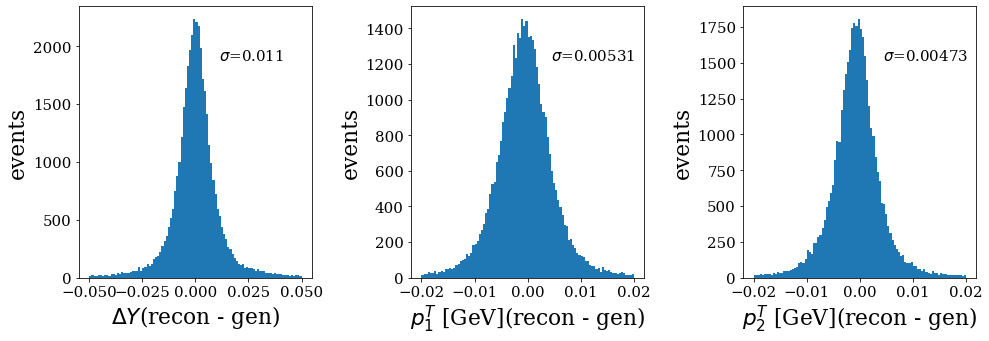

In [16]:
df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)

othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"


df = df.query(othercuts+" and h1_pid==211 and h2_pid==-211")

fig,axs = plt.subplots(1,3, figsize=(14, 5))
for i,(expr,xlabel,window) in enumerate(zip(\
            ("drap-drap_truth", "h1_cm_pt-h1_truth_cm_pt", "h2_cm_pt-h2_truth_cm_pt"),
                          ("$\Delta Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]"),
                                       (.05, .02, .02)        
                         )):
    d=df.eval(expr)
    plt.sca(axs[i])
    plt.hist(d, bins=100, range=(-window, window))
    plt.xlabel(xlabel+ "(recon - gen)")
    plt.ylabel("events")
    sigma = np.std(d[(d>-window) & (d<window)])
    plt.text(0.6, 0.8, f"$\sigma$={sigma:.3}", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


# Efficiency study

In [31]:
for df in dfs_pair[f'MC_{A}']:
    df['h2_truth_p']= np.sqrt()

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

(array([  806.,   892.,  1226.,  1748.,  2599.,  4144.,  6661., 10565.,
        16536., 20981.]),
 array([4.47440465e-04, 3.14561865e-01, 6.28676290e-01, 9.42790715e-01,
        1.25690514e+00, 1.57101956e+00, 1.88513399e+00, 2.19924841e+00,
        2.51336284e+00, 2.82747726e+00, 3.14159169e+00]),
 <BarContainer object of 10 artists>)

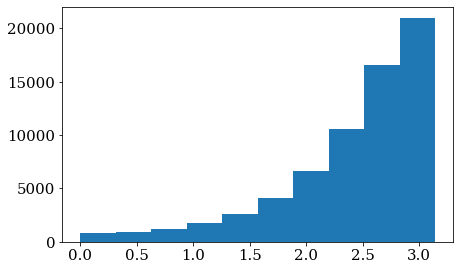

Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.029992936366674616 chi2= 53.171265879613145
Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.03271827252091659 chi2= 57.934076193329126


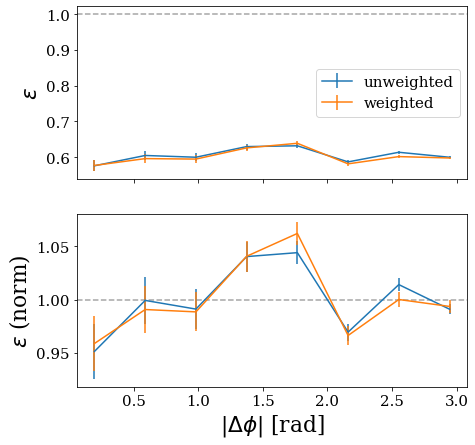

In [114]:
fig, axs = plt.subplots(2,1, figsize=(7,7), sharex='all')
for weighted in False, True:
    

    for A in "D".split():
        df = dfs_mc[f'{A}']
        cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.35"
        cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        #cuts='h1_cm_pt>0'
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
        #othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"
        #df = df.query(othercuts)
        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)
        dfpass = df.query("h2_pid==-211 and h2_z>0 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and (h1_p+h2_p)/nu<1.")
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        axs[0].errorbar(x,eff, deff,label=("weighted" if weighted else "unweighted"))
        axs[1].errorbar(x,y, dy)
axs[0].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].set_xlabel("$|\\Delta\\phi|$ [rad]")
axs[0].legend()
axs[0].set_ylabel("$\\epsilon$")
axs[1].set_ylabel("$\\epsilon$ (norm)")
plt.show()

Entries before cut  72175
Q2>1.0 and Q2<4.0 72175  (100.00  %)
0.2<h1_p<5.0  72175  (100.00  %)
inelasticity < 0.85 72175  (100.00  %)
h1_pid = pions (trigger) 72175  (100.00  %)
2.2 < nu <4.2 72175  (100.00  %)
10< h1_th 72175  (100.00  %)
Theta/P fiducial region selected for trigger hadron 72175  (100.00  %)
Nom cuts for the trigger applied 72175  (100.00  %)


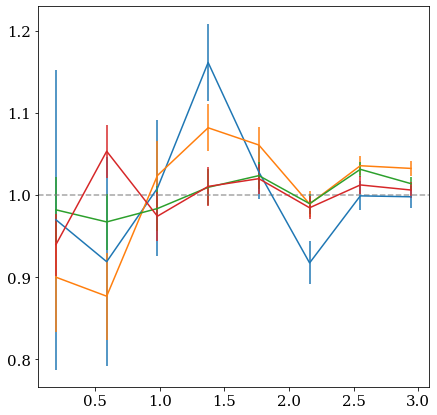

In [47]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
for A in "D".split():
    df = dfs_mc[f'MC_{A}']
    cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.35"
    cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
    cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
    cuts += " and ((h2_truth_th*180/pi>25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th*180/pi>30) or (h2_truth_th*180/pi>40))"
    
    df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
    
    for i in range(4):
        dfq = df.query(f"drap_truth>{i*.5} and drap_truth<{(i+1)*.5}")
        denom,x = np.histogram(dfq.eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        num,x = np.histogram(dfq.query("h2_z>0").eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        plt.errorbar(x,y, dy)
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')